In [ ]:
# prompt: read csv

import pandas as pd

df = pd.read_csv('/content/all-data.csv', encoding='latin-1')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
df['labels'].value_counts()

labels
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [ ]:
df.head()

,labels,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
X = df['text']
y = df['labels']

In [ ]:
y

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: labels, Length: 4846, dtype: object

In [ ]:
X = pd.DataFrame({'text':X.values})
y = pd.DataFrame({'labels':y.values})

In [ ]:
# splitting the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,text
432,"In Russia , Raisio 's Food Division 's home ma..."
3071,Operators only need to learn how to use one de...
289,The company expects its net sales in the first...
2588,The bridge will be 1.2 km long and is located ...
4121,Nokia and Capcom announced that Resident Evil ...
...,...
4426,"The currency effect had a 3.0 pct , or 20 mln ..."
466,`` Lidskoe Pivo 's investment program foresees...
3092,Products include Consumer Electronics devices ...
3772,The bridge is part of the highway 14 developme...


In [ ]:
# vectorizing the text data - we will have 1000 columns in the model - most important words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1000)

In [ ]:
vectorizer

TfidfVectorizer(max_features=1000)

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train['text'])
X_train_df = pd.DataFrame(X_train_vec.toarray())
X_train_df.columns = vectorizer.get_feature_names_out()

X_test_vec = vectorizer.transform(X_test['text'])
X_test_df = pd.DataFrame(X_test_vec.toarray())
X_test_df.columns = vectorizer.get_feature_names_out()


In [ ]:
X_test_df

,00,000,10,100,11,12,13,14,15,150,...,worldwide,worth,would,www,x20ac,year,years,yesterday,yit,you
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.389468,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.186088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
966,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# fitting base model with logistic regression

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
# fitting the model on training data

In [ ]:
logistic_model.fit(X_train_df, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# predicting the ouput on training and testing data

In [ ]:
y_pred_train = logistic_model.predict(X_train_df)
y_pred_test = logistic_model.predict(X_test_df)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
# displaying the performance metrics

              precision    recall  f1-score   support

    negative       0.90      0.58      0.71       494
     neutral       0.81      0.96      0.88      2308
    positive       0.86      0.64      0.74      1074

    accuracy                           0.83      3876
   macro avg       0.86      0.73      0.77      3876
weighted avg       0.83      0.83      0.82      3876

              precision    recall  f1-score   support

    negative       0.85      0.52      0.64       110
     neutral       0.76      0.93      0.84       571
    positive       0.78      0.56      0.65       289

    accuracy                           0.77       970
   macro avg       0.80      0.67      0.71       970
weighted avg       0.78      0.77      0.76       970



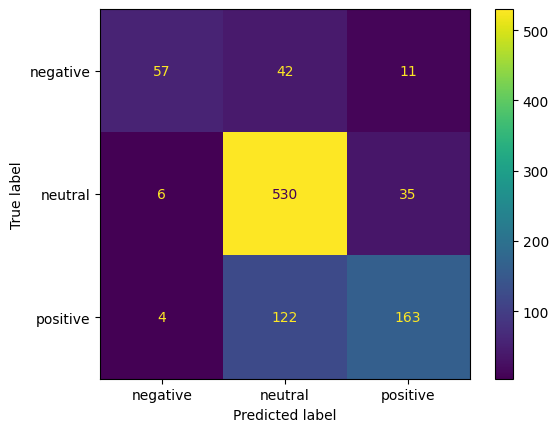

In [ ]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)